# task 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("task_data.xlsx")

 # Analyze the text reviews to identify the most common positive and negative keywords.

In [54]:
from collections import Counter

# Define positive, negative and neutral keywords (now including multi-word phrases)
positive_phrases = ["good", "very good", "excellent"]
negative_phrases = ["bad", "poor", "hate"]
neutral_phrases = ["average", "not rated", "okay"]

# Function to extract the presence of phrases in the review text
def extract_keywords(text):
    text = text.lower()  # Convert to lowercase for case-insensitive comparison
    words = []
    
    for phrase in positive_phrases + negative_phrases + neutral_phrases:
        if phrase in text:
            words.append(phrase)
    
    return words

# Flatten all reviews into a single list of keywords (considering multi-word phrases)
all_keywords = []
for review in data["Rating text"]:
    all_keywords.extend(extract_keywords(review))

# Count the occurrences of each keyword
keyword_count = Counter(all_keywords)

# Separate counts by categories
positive_count = Counter(word for word in all_keywords if word in positive_phrases)
negative_count = Counter(word for word in all_keywords if word in negative_phrases)
neutral_count = Counter(word for word in all_keywords if word in neutral_phrases)

# Print the top 5 most common keywords in each category
print("Most Common Positive Keywords:", positive_count.most_common(5))
print("Most Common Negative Keywords:", negative_count.most_common(5))
print("Most Common Neutral Keywords:", neutral_count.most_common(5))


Most Common Positive Keywords: [('good', 3172), ('very good', 1078), ('excellent', 300)]
Most Common Negative Keywords: [('poor', 186)]
Most Common Neutral Keywords: [('average', 3732), ('not rated', 2146)]


# Calculate the average length of reviews and explore if there is a relationship between review length and rating

Average Rating Text Length: 7.02 characters


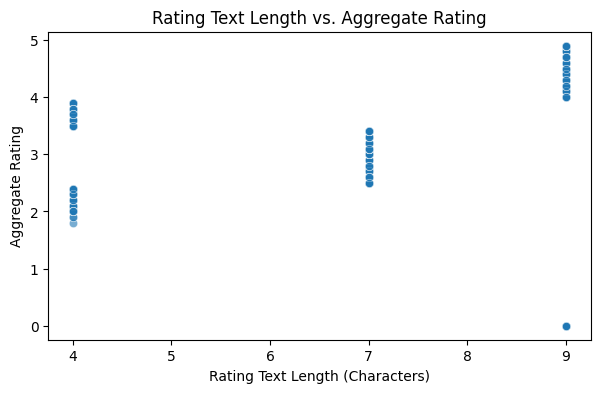

Correlation between rating text length and rating: -0.48


In [3]:
data["Rating Length"] = data["Rating text"].astype(str).apply(len)

# Calculate the average rating text length
average_rating_length = data["Rating Length"].mean()
print(f"Average Rating Text Length: {average_rating_length:.2f} characters")

# Scatter plot: Rating Text Length vs Aggregate Rating
plt.figure(figsize=(7, 4))
sns.scatterplot(data = data, x ="Rating Length", y ="Aggregate rating", alpha = 0.6)
plt.title("Rating Text Length vs. Aggregate Rating")
plt.xlabel("Rating Text Length (Characters)")
plt.ylabel("Aggregate Rating")
plt.show()

# Correlation between rating text length and rating
correlation = data[["Rating Length", "Aggregate rating"]].corr().iloc[0, 1]
print(f"Correlation between rating text length and rating: {correlation:.2f}")


# task 2

# Identify the restaurants with the highest and lowest number of votes.

In [23]:
restaurant_votes = data.groupby("Restaurant Name").agg({"Votes":"count"}).sort_values("Votes", ascending = False)

# Print the restaurant with the highest votes
print("Restaurant with the Highest Votes:")
print(restaurant_votes.head(1))

# Print the restaurant with the lowest votes
print("\nRestaurant with the Lowest Votes:")

print(restaurant_votes.tail(1))


Restaurant with the Highest Votes:
                 Votes
Restaurant Name       
Cafe Coffee Day     83

Restaurant with the Lowest Votes:
                 Votes
Restaurant Name       
feel ALIVE           1


 # Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Correlation between Votes and Aggregate Rating: 0.31


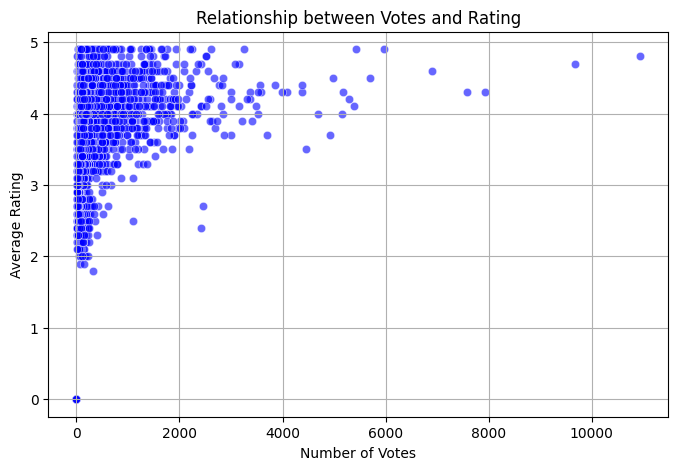

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("task_data.xlsx")

# Calculate correlation coefficient
correlation = data["Votes"].corr(data["Aggregate rating"])
print(f"Correlation between Votes and Aggregate Rating: {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data= data, x= "Votes", y= "Aggregate rating", alpha=0.6, color= "blue")
plt.title("Relationship between Votes and Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


# task 3

# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

Cross-tabulation for Price Range and Online Delivery:
 Has Online delivery    No   Yes  Total
Price range                           
1                    3736   701   4437
2                    1824  1285   3109
3                     994   411   1405
4                     532    53    585
Total                7086  2450   9536

Cross-tabulation for Price Range and Table Booking:
 Has Table booking    No   Yes  Total
Price range                         
1                  4436     1   4437
2                  2870   239   3109
3                   761   644   1405
4                   311   274    585
Total              8378  1158   9536


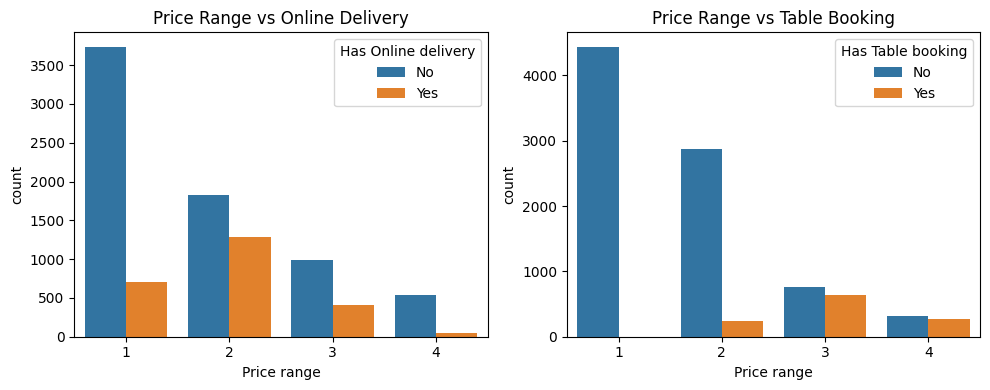

In [4]:
# Create a cross-tabulation to analyze the relationship between price range and online delivery/table booking
delivery_table = pd.crosstab(data["Price range"], data["Has Online delivery"], margins = True, margins_name="Total")
booking_table = pd.crosstab(data["Price range"], data["Has Table booking"], margins = True, margins_name="Total")

# Print the cross-tabulated tables
print("Cross-tabulation for Price Range and Online Delivery:\n", delivery_table)
print("\nCross-tabulation for Price Range and Table Booking:\n", booking_table)
# Visualize the relationship using bar plots
plt.figure(figsize = (10, 4))

# Plot for Online Delivery
plt.subplot(1, 2, 1)
sns.countplot(data = data, x= "Price range", hue = "Has Online delivery")
plt.title("Price Range vs Online Delivery")

# Plot for Table Booking
plt.subplot(1, 2, 2)
sns.countplot(data = data, x = "Price range", hue = "Has Table booking")
plt.title("Price Range vs Table Booking")

plt.tight_layout()
plt.show()

# Determine if higher-priced restaurants are more likely to offer these services.

   Price range  Online_Delivery_Percentage  Table_Booking_Percentage
0            1                   15.798963                  0.022538
1            2                   41.331618                  7.687359
2            3                   29.252669                 45.836299
3            4                    9.059829                 46.837607


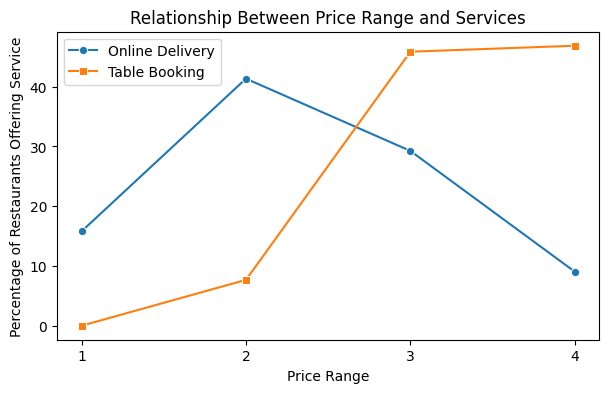

In [71]:
# Group by Price Range and calculate the percentage of restaurants offering these services
service_analysis = data.groupby("Price range").agg(Online_Delivery_Percentage = ("Has Online delivery", lambda x: (x.str.lower() == "yes").mean() * 100),
    Table_Booking_Percentage = ("Has Table booking", lambda x: (x.str.lower() == "yes").mean() * 100)
).reset_index()

# Print results
print(service_analysis)

plt.figure(figsize=(7, 4))
sns.lineplot(data=service_analysis, x = "Price range", y = "Online_Delivery_Percentage", marker = "o", label = "Online Delivery")

sns.lineplot(data=service_analysis, x = "Price range", y = "Table_Booking_Percentage", marker = "s", label="Table Booking")

plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants Offering Service")
plt.title("Relationship Between Price Range and Services")
plt.xticks(service_analysis["Price range"])
plt.legend()

plt.show()
